In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

import os

## lectura y preprocesamiento

In [7]:
# PATH_TO_DATA = "/content/drive/Shareddrives/CVR/TRABAJANDO/datos"
PATH_TO_DATA = "./../datos payU"

datos = []
for file in os.listdir(PATH_TO_DATA):
    datos.append( pd.read_csv(os.path.join(PATH_TO_DATA, file), sep=";") )

datos = pd.concat(datos, axis=0, ignore_index=True)

datos.drop_duplicates(inplace=True)

In [8]:
# columnas que no son importantes para el analisis
deleted_cols = [
    "Id Transacci?n",
    "Id Orden",
    "Referencia",
    "Nombre del pagador",
    "Moneda original",                      # todas son COP (al menos con los datos que tengo)
    "Moneda procesada",                     # todos son COP
    "N?mero visible tarjeta de cr?dito",
    "Tipo de transacci?n",                  # todas son iguales (al menos con los datos que tengo)
    "C?digo de trazabilidad",
    "id aliado"                             # esta vacia (al menos con los datos que tengo)
]

datos.drop(columns=deleted_cols, inplace=True)

datos.head()

,Fecha de creaci?n,?ltima actualizaci?n,Descripci?n,Email del comprador,Valor original,Valor procesado,Estado de orden,Medio de pago,Tipo de tarjeta de cr?dito,Banco emisor,Estado de transacci?n,C?digo de respuesta,N?mero de cuotas totales
0,2022-04-30 14:40:24.833,2022-04-30 14:41:42.735,Compra de ?VIP PLATA? en CVR,hernandezsebas2018@gmail.com,12000.0,12000.0,CAPTURED,PSE,NaN,NaN,APPROVED,APPROVED,1.0
1,2022-04-30 14:38:29.24,2022-04-30 14:38:29.772,Compra de ?VIP PLATA? en CVR,hernandezsebas2018@gmail.com,12000.0,12000.0,DECLINED,Visa,DEBIT,BANCOLOMBIA S.A.- NEQUI,DECLINED,ANTIFRAUD_REJECTED,1.0
2,2022-04-30 14:11:55.126,2022-04-30 14:11:58.817,Compra de ?VIP ESMERALDA? en CVR,unicorniodefuego7348@gmail.com,28000.0,28000.0,CAPTURED,Visa,DEBIT,BANCOLOMBIA S.A.- NEQUI,APPROVED,APPROVED,1.0
3,2022-04-30 14:11:52.804,2022-04-30 14:11:56.079,Compra de ? VIP BUNDLE ? en CVR,iconavarosse@gmail.com,35000.0,35000.0,CAPTURED,Visa,DEBIT,BANCOLOMBIA S.A.- NEQUI,APPROVED,APPROVED,1.0
4,2022-04-29 20:18:16.139,2022-04-29 20:21:40.947,Compra de ?VIP DIAMANTE? en CVR,Pedritonavajas1110@gmail.com,18000.0,18000.0,CAPTURED,PSE,NaN,NaN,APPROVED,APPROVED,1.0


In [9]:
# convertir fechas
datos["Fecha de creaci?n"] = pd.to_datetime(datos["Fecha de creaci?n"], infer_datetime_format=True)
datos["?ltima actualizaci?n"] = pd.to_datetime(datos["?ltima actualizaci?n"], infer_datetime_format=True)

datos.sort_values(by="?ltima actualizaci?n", inplace=True)

C:\Users\jnico\AppData\Local\Temp\ipykernel_11644\3155866375.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  datos["Fecha de creaci?n"] = pd.to_datetime(datos["Fecha de creaci?n"], infer_datetime_format=True)
C:\Users\jnico\AppData\Local\Temp\ipykernel_11644\3155866375.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  datos["?ltima actualizaci?n"] = pd.to_datetime(datos["?ltima actualizaci?n"], infer_datetime_format=True)


In [10]:
# manejar algunos valores nulos
datos["Medio de pago"].fillna("no reporta", inplace=True)
datos["Tipo de tarjeta de cr?dito"].fillna("no reporta", inplace=True)
datos["Banco emisor"].fillna("no reporta", inplace=True)

In [11]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1626 entries, 483 to 1488
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Fecha de creaci?n           1626 non-null   datetime64[ns]
 1   ?ltima actualizaci?n        1626 non-null   datetime64[ns]
 2   Descripci?n                 1626 non-null   object        
 3   Email del comprador         1626 non-null   object        
 4   Valor original              1626 non-null   float64       
 5   Valor procesado             1626 non-null   float64       
 6   Estado de orden             1626 non-null   object        
 7   Medio de pago               1626 non-null   object        
 8   Tipo de tarjeta de cr?dito  1626 non-null   object        
 9   Banco emisor                1626 non-null   object        
 10  Estado de transacci?n       1626 non-null   object        
 11  C?digo de respuesta         1626 non-null   object        


# visualizacion y analisis

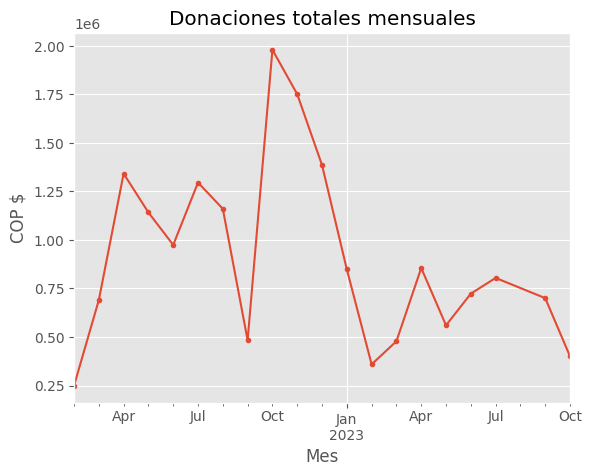

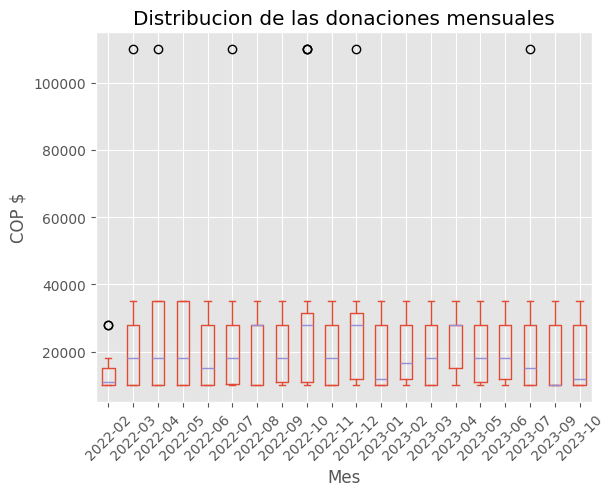

In [12]:
datos_copy = datos.copy()

datos_copy.query("`Estado de transacci?n` == 'APPROVED'", inplace=True)

datos_copy["?ltima actualizaci?n"] = datos_copy["?ltima actualizaci?n"].dt.to_period("M")

# ########################################################################################

ventas_mensuales = datos_copy.groupby(by="?ltima actualizaci?n")["Valor procesado"].sum()

ventas_mensuales.plot.line(marker=".")

plt.title("Donaciones totales mensuales")
plt.ylabel("COP $")
plt.xlabel("Mes")

# #########################################################################################

dist_ventas_mensuales = datos_copy[["?ltima actualizaci?n", "Valor procesado"]]

dist_ventas_mensuales.plot.box("?ltima actualizaci?n")

plt.title("Distribucion de las donaciones mensuales")
plt.ylabel("COP $")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.show()

# #########################################################################################



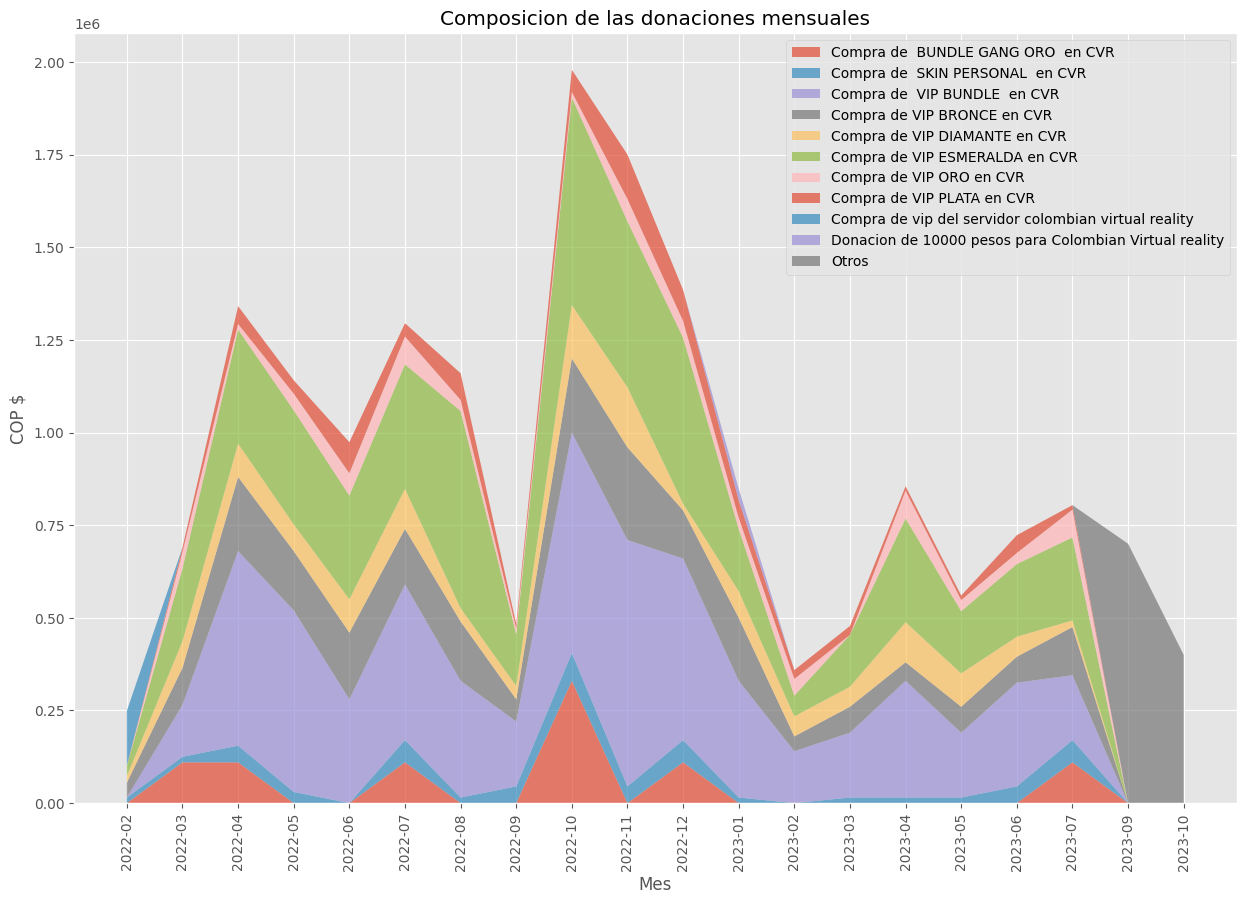

In [13]:
datos_copy = datos[["?ltima actualizaci?n", "Descripci?n", "Valor procesado", "Estado de transacci?n"]].copy()
datos_copy["?ltima actualizaci?n"] = datos_copy["?ltima actualizaci?n"].dt.to_period("M")
datos_copy["Descripci?n"] = datos_copy["Descripci?n"].str.replace("?", "", regex=False)

datos_copy.query("`Estado de transacci?n` == 'APPROVED'", inplace=True)

filtro = datos_copy["Descripci?n"].str.contains("para el usuario")
datos_copy.loc[filtro, "Descripci?n"] = "Otros"

ventas_por_producto = pd.pivot_table(
    data = datos_copy,
    index = "?ltima actualizaci?n",
    columns = "Descripci?n",
    values = "Valor procesado",
    aggfunc = "sum"
)

ventas_por_producto.reset_index(inplace=True)
ventas_por_producto.fillna(0, inplace=True)

x = ventas_por_producto["?ltima actualizaci?n"]

cols_y = ventas_por_producto.columns.difference(["?ltima actualizaci?n"])
y = ventas_por_producto[cols_y].T

plt.figure(figsize=(15,10))

plt.stackplot(
    range(y.shape[1]),
    y,
    labels = cols_y,
    alpha=0.7,
)

plt.xlabel("Mes")
plt.ylabel("COP $")
plt.title("Composicion de las donaciones mensuales")
plt.legend()
plt.xticks(range(y.shape[1]), labels=x, rotation=90)
plt.show()

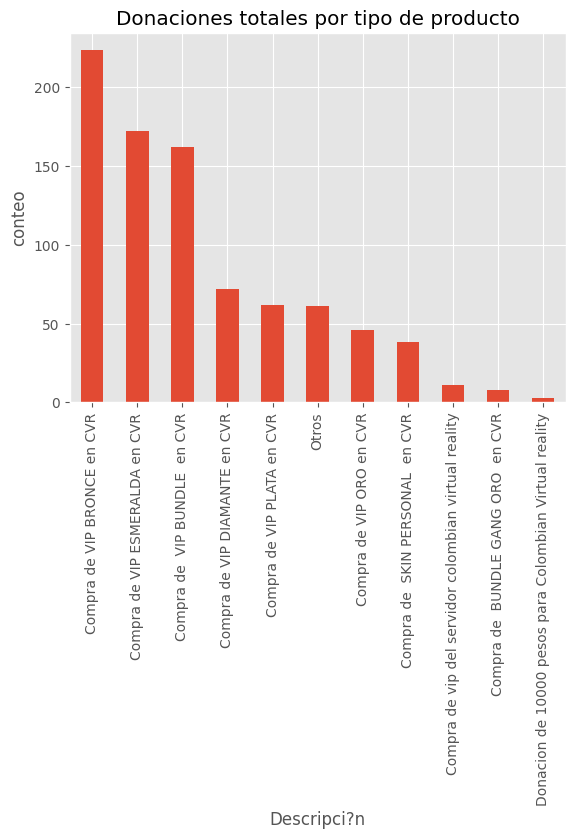

In [14]:
datos_copy = datos[["Descripci?n", "Estado de transacci?n"]].copy()
datos_copy["Descripci?n"] = datos_copy["Descripci?n"].str.replace("?", "", regex=False)

datos_copy.query("`Estado de transacci?n` == 'APPROVED'", inplace=True)

filtro = datos_copy["Descripci?n"].str.contains("para el usuario")
datos_copy.loc[filtro, "Descripci?n"] = "Otros"


datos_copy["Descripci?n"].value_counts().plot.bar()

plt.title("Donaciones totales por tipo de producto")
plt.ylabel("conteo")
plt.show()

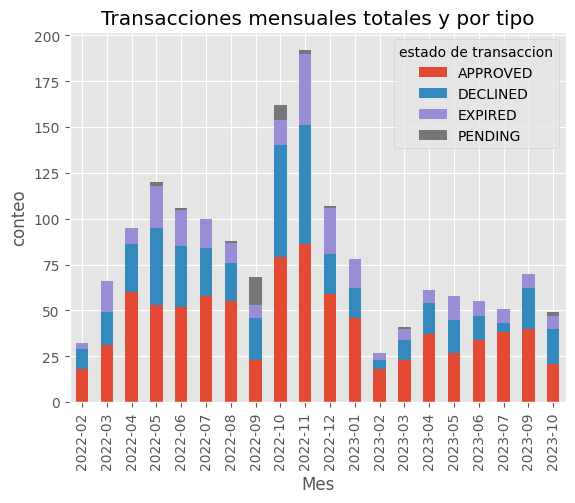

In [15]:
datos_copy = datos.copy()
datos_copy["?ltima actualizaci?n"] = datos_copy["?ltima actualizaci?n"].dt.to_period("M")

datos_copy = datos_copy[["?ltima actualizaci?n", "Estado de transacci?n", "Email del comprador"]]
datos_copy = datos_copy.groupby(["?ltima actualizaci?n", "Estado de transacci?n"], as_index=False).count()

estados_transacciones_mensuales = datos_copy.pivot(
    columns="Estado de transacci?n",
    index="?ltima actualizaci?n",
    values="Email del comprador"
)

estados_transacciones_mensuales.plot.bar(stacked=True)

plt.xlabel("Mes")
plt.ylabel("conteo")
plt.legend(title="estado de transaccion")
plt.title("Transacciones mensuales totales y por tipo")

plt.show()

# sdasd